<center><h1>Analisis de Series Temporales</h1></center>
<center><h2>Lab 1 Alternativo</h2></center>
<br>

Fernando Ezequiel Mancuso 


In [3]:
# Packages
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [4]:
# Plot settings
sns.set_context('notebook') 
sns.set_style('ticks')
red='#D62728'
blue='#1F77B4'
%matplotlib inline

A partir de un valor de ventas de tarjeta de credito en un punto en el tiempo, dibujar una serie temporal basandonos en datos publicos

Para lograrlo, nos basamos en el valor de las acciones de IRCP (Alto palermo) desde:
    
https://www.invertironline.com/api/cotizaciones/history?symbolName=IRCP&exchange=BCBA&from=1391729200&to=1424993197&resolution=D
        
Al tratarse de una empresa de consumo, su valor se encuentra directamente relacionado al uso que la gente da a la tarjeta de credito.

In [15]:
import json
with open('ircp.json') as data_file:    
    data_json = json.load(data_file)
data_json['bars']

[{'time': 1391742000,
  'close': 50.03309403,
  'open': 50.12574839,
  'high': 50.12574839,
  'low': 50.03309403,
  'volume': 0.0},
 {'time': 1392001200,
  'close': 48.64327881,
  'open': 48.64327881,
  'high': 48.64327881,
  'low': 48.64327881,
  'volume': 19.0},
 {'time': 1392087600,
  'close': 48.64327881,
  'open': 48.64327881,
  'high': 48.64327881,
  'low': 48.64327881,
  'volume': 0.0},
 {'time': 1392174000,
  'close': 47.25347301,
  'open': 47.25347301,
  'high': 47.25347301,
  'low': 47.25347301,
  'volume': 250.0},
 {'time': 1392260400,
  'close': 47.25347301,
  'open': 47.25347301,
  'high': 47.25347301,
  'low': 47.25347301,
  'volume': 0.0},
 {'time': 1392346800,
  'close': 46.32693891,
  'open': 47.25347301,
  'high': 47.25347301,
  'low': 46.32693891,
  'volume': 226.0},
 {'time': 1392606000,
  'close': 44.01058963,
  'open': 44.47386136,
  'high': 44.47386136,
  'low': 43.54731789,
  'volume': 397.0},
 {'time': 1392692400,
  'close': 44.01058963,
  'open': 44.01058963,


In [26]:

data=pd.read_json('ircp.json', orient ='records',typ = 'series', convert_dates='time', date_unit='s')
data = pd.io.json.json_normalize(data['bars'])
data = data.set_index('time')
data.tail()

,close,high,low,open,volume
time,,,,,
1424660400,61.952904,61.952904,61.952904,61.952904,125.0
1424746800,61.952904,61.952904,61.952904,61.952904,0.0
1424833200,61.952904,61.952904,61.952904,61.952904,0.0
1424919600,63.350337,63.350337,63.350337,63.350337,100.0
1424968247,68.000000,68.000000,68.000000,68.000000,100.0


## Analisis exploratorio

Tomamos solamente los valores de cierre y graficamos la serie. 

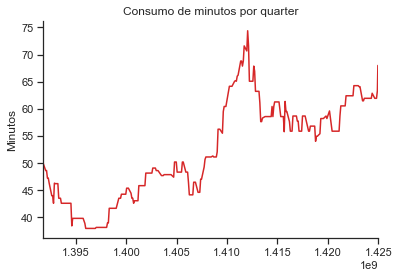

In [27]:
fig, ax= plt.subplots();
data['close'].plot(color=red)
ax.set_xlabel('')
ax.set_ylabel('Minutos')
ax.set_title('Consumo de minutos por quarter')
sns.despine()
plt.show()